This part is pretty much done. All of the code above the "#####################################################" (including the imports) is required to make this part run. The only line which must be executed to make this run is "V,TF=genInit(x,y,nSmall,maxPot)" where x and y are the dimensions of the overall array, nSmall is the number of shapes to add randomly to the potential array and maxPot is the maximum potential applied to any of the initial arrays. The outputs are as follows: V is the initial potential array, and TF is the true/false array where points which are not initially fixed correspond to a false, and those which are initially fixed correspond to a true. See the output arrays at the end for visual examples of this.

Things to add:

1) If two objects touch they should have the same potential as each other

2) Maybe bigger or differently shaped objects? Depends on how the solved state of the system looks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import IPython.display as display
import random as rand

# Universal Electric Potential Field Solver

#### Brayden Freitas, Emily Richards, Gabe Hofferman

Electric potential fields are importeant in predicting many things within physics and related fields, esspecially in regards to the trajectories of charged particles. 

The electric potential field $V$ from any arbitray charge distribution is dictated by Poisson's equation, which in two dimensions is: $$\nabla^2 V = -\frac{\rho}{\epsilon}.$$ 

When the charge density is 0 (as in the case of finding the potential between charged objects), this becomes Laplace's equation, which we write using the second-order differential operator of the laplacian instead of $\nabla^2$ to indicate that we will be more focused on the PDE aspect of the solution than the calculus aspect: $$\Delta V=0$$ which can be viewed as a basic Green's theorem problem for a harmonic function, with the boundary conditions $D$ and $\delta D$ illustrated below.

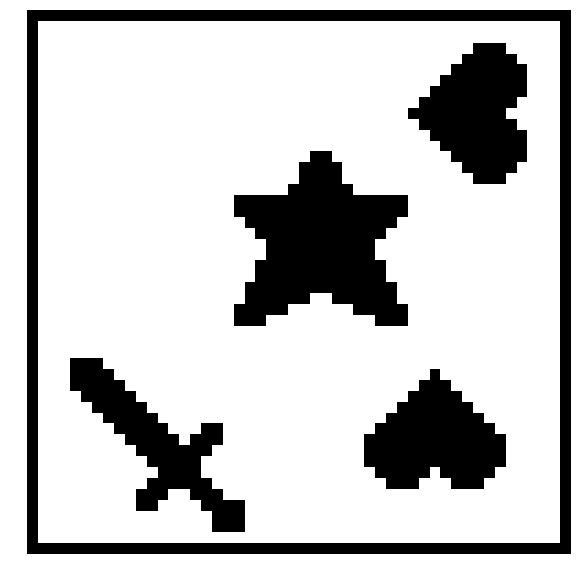

In [11]:
def cArys(x,y):
    V=np.zeros((x,y))
    TF=np.ones((x,y),dtype=bool)
    Fy=np.zeros((1,y),dtype=bool)
    Fx=np.zeros((1,x),dtype=bool)
    TF[0]=TF[x-1]=Fy
    TF.T[0]=TF.T[y-1]=Fx
    return V,TF

def bgArys(ind,rot,pot):
    if ind==0:
        A=[[0,0,pot,pot,pot,0,0,0,pot,pot,pot,0,0],
           [0,pot,pot,pot,pot,pot,0,pot,pot,pot,pot,pot,0],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
           [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
           [0,0,0,pot,pot,pot,pot,pot,pot,pot,0,0,0],
           [0,0,0,0,pot,pot,pot,pot,pot,0,0,0,0],
           [0,0,0,0,0,pot,pot,pot,0,0,0,0,0],
           [0,0,0,0,0,0,pot,0,0,0,0,0,0]]
        return rota(np.array(A),rot)
    if ind==1:
        A=[[0,0,0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0],
          [0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0,0],
          [0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0,0,0],
          [0,0,pot,pot,0,0,0,pot,pot,pot,pot,pot,0,0,0,0],
          [0,0,pot,pot,pot,0,pot,pot,pot,pot,pot,0,0,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,pot,pot,pot,pot,pot,0,0,0,0,0,0,0],
          [0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,0,0,0,0,0,0,0],
          [0,0,pot,pot,pot,0,0,pot,pot,pot,0,0,0,0,0,0],
          [pot,pot,pot,pot,0,0,0,0,pot,pot,0,0,0,0,0,0],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,0,0,0]]
        return rota(np.array(A),rot)
    if ind==2:
        A=[[0,0,0,0,0,0,0,pot,pot,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,0,pot,pot,pot,pot,pot,pot,0,0,0,0,0],
          [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
          [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
          [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
          [0,pot,pot,pot,pot,pot,pot,0,0,pot,pot,pot,pot,pot,pot,0],
          [pot,pot,pot,pot,pot,0,0,0,0,0,0,pot,pot,pot,pot,pot],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==3:
        A=[[0,0,0,0,0,pot,0,pot,0,0,0,0],
        [0,0,0,0,0,0,pot,0,0,0,0,0],
        [0,0,0,0,0,0,pot,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,pot,0,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,0,pot,pot,0,0,0],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
        [pot,pot,pot,pot,0,0,0,0,0,0,0,0],
        [pot,pot,pot,0,0,0,0,0,0,0,0,0],
        [pot,pot,pot,0,0,pot,pot,pot,pot,pot,pot,0],
        [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
        [0,0,pot,pot,pot,pot,pot,0,0,pot,pot,pot],
        [0,0,0,0,0,0,0,0,0,pot,pot,pot],
        [0,0,0,0,0,0,0,0,0,pot,pot,0],
        [0,0,0,0,0,0,0,0,pot,pot,pot,0],
        [0,0,0,0,0,0,0,pot,pot,0,0 ,0],
        [0,0,0,0,0,0,0,pot,pot,0,0 ,0],
        [0,0,0,0,0,0,0,0,pot,0,0 ,0]]
        return rota(np.array(A),rot)
    return False

def rota(A,rot):
    for n in range(0,rot):
        A=np.rot90(A)
    return A

def insrt(xi,yi,A,V,TF):
    lx,ly=np.shape(A)
    if np.all(TF[xi:xi+lx,yi:yi+ly]==True):
        V[xi:xi+lx,yi:yi+ly]=A
        TF[xi:xi+lx,yi:yi+ly]=(A==0)
        return False
    else:
        return True
    
def genInit(x,y,nSmall,minPot,maxPot):
    V,TF=cArys(x,y)
    for n in range(nSmall):
        check=True
        while check:
            ind=rand.randint(0,3)
            rot=rand.randint(0,3)
            pot=rand.uniform(minPot,maxPot)
            A=bgArys(ind,rot,pot)
            xi=rand.randint(0,x-1)
            yi=rand.randint(0,y-1)
            check=insrt(xi,yi,A,V,TF)
    TF=np.logical_not(TF)
    return V,TF

V1,TF1=genInit(50,50,4,-5,5)
plt.figure(figsize=(10,10))
#plt.title("General System setup")
plt.imshow(TF1.T,cmap="binary",origin="lower")
plt.axis("off")
#plt.text(51,25,"Black is the boundary condition ($TF_{ij}=False, while white is where teh system is to be ")
plt.show()

Where the above system is described as $$\left\{\begin{align*}
\Delta V(\vec{x}) &= 0  &\vec{x}\in D  \\
V(\vec{x})&= f &\vec{x}\in\delta D
\end{align*}\right..$$

Because of this, the Mean-Value Property can be applied, which states that: $$\forall \: \vec{x_o}\in D, V(\vec{x_0})=\frac{1}{|\delta B_r(\vec{x_0})|}\iint_{\delta B_r(\vec{x_0})}V(\vec{x})\:d\vec{S},$$
or rather, that the value of $V$ at any point $\vec{x_0}$ in $D$ is dependent upon the average of all the points equidistant from $\vec{x_0}$, represedented by a ball centered at $\vec{x_0}$ called $\delta B_r(\vec{x_0})$. The benefit of this is that it is possible to discretize the system, treating the whole system $\bar{D}=D\cup\delta D$ as an array of the size $i,j$ called $\bar{D_{ij}}$. While $\delta B_r(\vec{x_0})$ is **any** set of points equidistant from $\vec{x_0}$, $\delta B_1(\vec{x_0})$ is the set of 4 points directly adjacent to $\vec{x_0}$, and as such is the smallest possible set of $\delta B_r(\vec{x_0})$ in $\bar{D_{ij}}$ which is not just $\{\vec{x_0}\}$. This is where the method of relaxation arises from rigorously. Since we are only taking into consideration the closest points, we need to run this multiple times until the function is nearly smooth (defined by some tolerance).

One difficulty is that, because of our random system, we need some way of always differentiating between $D$ and $\delta D$. This is why we generate a True/False array, which we have as True for boundary conditions($\delta D$), and False for other locations ($D$).

We can generate systems of any size, in both cases with outside boundaries of all 0, as well as having two walls at any two potentials to create an overall potential difference to allow charge to flow in one preferential direction.

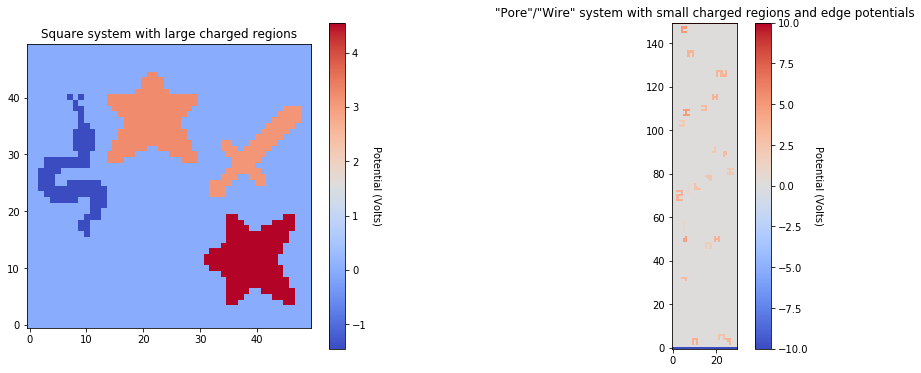

In [3]:
def cArysPore(x,y,Vn,Vp):
    V=np.zeros((x,y))
    TF=np.ones((x,y),dtype=bool)
    Fy=np.zeros((1,y),dtype=bool)
    Fx=np.zeros((1,x),dtype=bool)
    Vp=Vp*np.ones((1,x))
    Vn=Vn*np.ones((1,x))
    TF[0]=TF[x-1]=Fy
    TF.T[0]=TF.T[y-1]=Fx
    V.T[0]=Vn
    V.T[-1]=Vp
    return V,TF

def smArys(ind,rot,pot):
    if ind==0:
        A=[[pot,pot,0],[pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==1:
        A=[[pot,pot,pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==2:
        A=[[pot,pot,pot],[0,0,pot],[pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==3:
        A=[[pot,pot,pot,0,pot],[pot,0,pot,0,pot],[pot,0,pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==4:
        A=[[pot,pot,pot],[0,pot,pot],[0,0,pot]]
        return rota(np.array(A),rot)
    if ind==5:
        A=[[pot,0,pot],[pot,pot,pot],[pot,0,pot]]
        return rota(np.array(A),rot)
    if ind==6:
        A=[[0,pot],[0,pot],[pot,pot]]
        return rota(np.array(A),rot)
    return False
        
def genPore(x,y,nSmall,minPot,maxPot,Vn,Vp):
    V,TF=cArysPore(x,y,Vn,Vp)
    for n in range(nSmall):
        check=True
        while check:
            ind=rand.randint(0,6)
            rot=rand.randint(0,3)
            pot=rand.uniform(minPot,maxPot)
            A=smArys(ind,rot,pot)
            xi=rand.randint(0,x-1)
            yi=rand.randint(0,y-1)
            check=insrt(xi,yi,A,V,TF)
    TF=np.logical_not(TF)
    return V,TF

##########################################################################################################

V,TF=genPore(30,150,25,0,5,-10,10)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title("Square system with large charged regions")
plt.imshow(V1.T,cmap="coolwarm",origin="lower")
cbar=plt.colorbar()
cbar.set_label("Potential (Volts)", rotation=270,labelpad=15)
plt.subplot(122)
plt.title('"Pore"/"Wire" system with small charged regions and edge potentials')
plt.imshow(V.T,cmap="coolwarm",origin="lower")
cbar=plt.colorbar()
cbar.set_label("Potential (Volts)", rotation=270,labelpad=15)
plt.show()

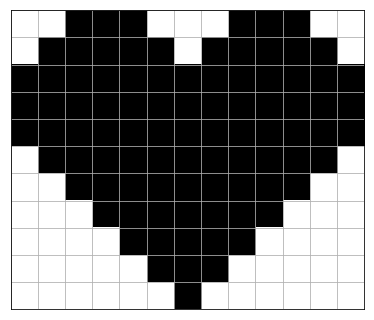

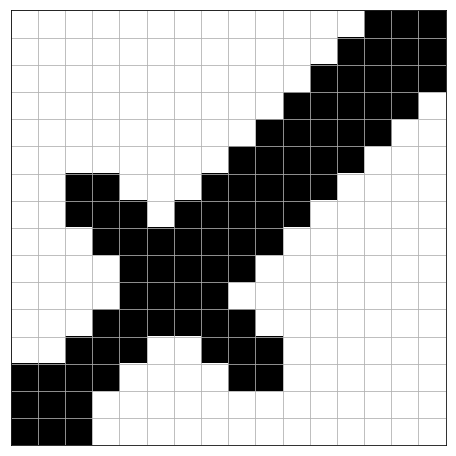

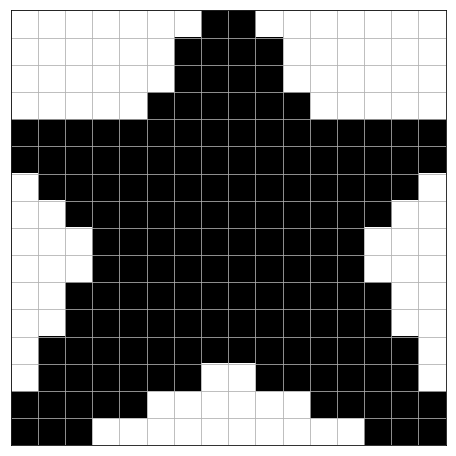

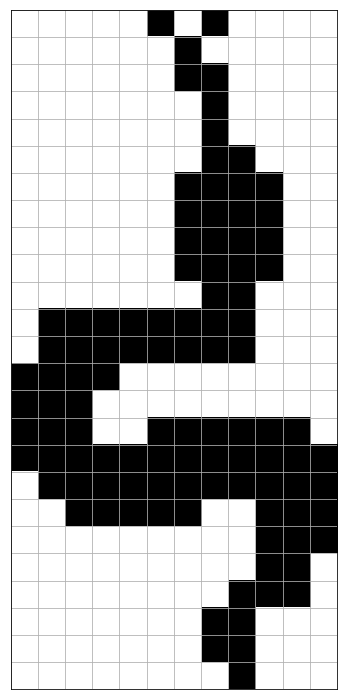

In [55]:
pot=1
A=[[0,0,pot,pot,pot,0,0,0,pot,pot,pot,0,0],
   [0,pot,pot,pot,pot,pot,0,pot,pot,pot,pot,pot,0],
   [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
   [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
   [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
   [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
   [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
   [0,0,0,pot,pot,pot,pot,pot,pot,pot,0,0,0],
   [0,0,0,0,pot,pot,pot,pot,pot,0,0,0,0],
   [0,0,0,0,0,pot,pot,pot,0,0,0,0,0],
   [0,0,0,0,0,0,pot,0,0,0,0,0,0]]
B=[[0,0,0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot],
   [0,0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot],
   [0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot],
   [0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0],
   [0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0,0],
   [0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0,0,0],
   [0,0,pot,pot,0,0,0,pot,pot,pot,pot,pot,0,0,0,0],
   [0,0,pot,pot,pot,0,pot,pot,pot,pot,pot,0,0,0,0,0],
   [0,0,0,pot,pot,pot,pot,pot,pot,pot,0,0,0,0,0,0],
   [0,0,0,0,pot,pot,pot,pot,pot,0,0,0,0,0,0,0],
   [0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0,0,0],
   [0,0,0,pot,pot,pot,pot,pot,pot,0,0,0,0,0,0,0],
   [0,0,pot,pot,pot,0,0,pot,pot,pot,0,0,0,0,0,0],
   [pot,pot,pot,pot,0,0,0,0,pot,pot,0,0,0,0,0,0],
   [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,0,0,0],
   [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,0,0,0]]
C=[[0,0,0,0,0,0,0,pot,pot,0,0,0,0,0,0,0],
   [0,0,0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0],
   [0,0,0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0],
   [0,0,0,0,0,pot,pot,pot,pot,pot,pot,0,0,0,0,0],
   [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
   [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
   [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
   [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
   [0,0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
   [0,0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
   [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
   [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
   [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
   [0,pot,pot,pot,pot,pot,pot,0,0,pot,pot,pot,pot,pot,pot,0],
   [pot,pot,pot,pot,pot,0,0,0,0,0,0,pot,pot,pot,pot,pot],
   [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,pot,pot,pot]]
D=[[0,0,0,0,0,pot,0,pot,0,0,0,0],
    [0,0,0,0,0,0,pot,0,0,0,0,0],
    [0,0,0,0,0,0,pot,pot,0,0,0,0],
    [0,0,0,0,0,0,0,pot,0,0,0,0],
    [0,0,0,0,0,0,0,pot,0,0,0,0],
    [0,0,0,0,0,0,0,pot,pot,0,0,0],
    [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
    [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
    [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
    [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
    [0,0,0,0,0,0,0,pot,pot,0,0,0],
    [0,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
    [0,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
    [pot,pot,pot,pot,0,0,0,0,0,0,0,0],
    [pot,pot,pot,0,0,0,0,0,0,0,0,0],
    [pot,pot,pot,0,0,pot,pot,pot,pot,pot,pot,0],
    [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
    [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
    [0,0,pot,pot,pot,pot,pot,0,0,pot,pot,pot],
    [0,0,0,0,0,0,0,0,0,pot,pot,pot],
    [0,0,0,0,0,0,0,0,0,pot,pot,0],
    [0,0,0,0,0,0,0,0,pot,pot,pot,0],
    [0,0,0,0,0,0,0,pot,pot,0,0 ,0],
    [0,0,0,0,0,0,0,pot,pot,0,0 ,0],
    [0,0,0,0,0,0,0,0,pot,0,0 ,0]]

fig = plt.figure(figsize=(6.5,5.5))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(A,cmap="binary")
ax.set_xticks(np.arange(-0.5,13.5,1))
ax.set_yticks(np.arange(-0.5,11.5,1))
ax.grid(True)
for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(B,cmap="binary")
ax.set_xticks(np.arange(-0.5,16.5,1))
ax.set_yticks(np.arange(-0.5,16.5,1))
ax.grid(True)
for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(C,cmap="binary")
ax.set_xticks(np.arange(-0.5,16.5,1))
ax.set_yticks(np.arange(-0.5,16.5,1))
ax.grid(True)
for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
plt.show()

fig = plt.figure(figsize=(6,12.5))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(D,cmap="binary")
ax.set_xticks(np.arange(-0.5,12.5,1))
ax.set_yticks(np.arange(-0.5,25.5,1))
ax.grid(True)
for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
plt.show()

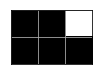

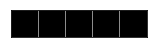

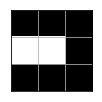

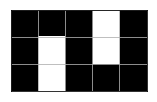

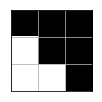

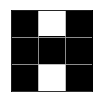

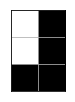

In [82]:
A=[[pot,pot,0],[pot,pot,pot]]
B=[[pot,pot,pot,pot,pot],[0,0,0,0,0]]
C=[[pot,pot,pot],[0,0,pot],[pot,pot,pot]]
D=[[pot,pot,pot,0,pot],[pot,0,pot,0,pot],[pot,0,pot,pot,pot]]
E=[[pot,pot,pot],[0,pot,pot],[0,0,pot]]
F=[[pot,0,pot],[pot,pot,pot],[pot,0,pot]]
G=[[0,pot],[0,pot],[pot,pot]]

fig = plt.figure(figsize=(1.5,1))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(A,cmap="binary")
ax.set_xticks(np.arange(-0.5,3.5,1))
ax.set_yticks(np.arange(-0.5,2.5,1))
ax.grid(True)
for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
plt.show()

fig = plt.figure(figsize=(2.5,0.5))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(B,cmap="binary")
ax.set_xticks(np.arange(-0.5,5.5,1))
ax.set_yticks(np.arange(-0.5,1.5,1))
plt.ylim(-0.5,0.5)
ax.grid(True)
for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
plt.show()

fig = plt.figure(figsize=(1.5,1.5))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(C,cmap="binary")
ax.set_xticks(np.arange(-0.5,3.5,1))
ax.set_yticks(np.arange(-0.5,2.5,1))
ax.grid(True)
for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
plt.show()

fig = plt.figure(figsize=(2.5,1.5))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(D,cmap="binary")
ax.set_xticks(np.arange(-0.5,5.5,1))
ax.set_yticks(np.arange(-0.5,2.5,1))
ax.grid(True)
for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
plt.show()

fig = plt.figure(figsize=(1.5,1.5))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(E,cmap="binary")
ax.set_xticks(np.arange(-0.5,2.5,1))
ax.set_yticks(np.arange(-0.5,2.5,1))
ax.grid(True)
for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
plt.show()

fig = plt.figure(figsize=(1.5,1.5))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(F,cmap="binary")
ax.set_xticks(np.arange(-0.5,2.5,1))
ax.set_yticks(np.arange(-0.5,2.5,1))
ax.grid(True)
for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
plt.show()

fig = plt.figure(figsize=(1,1.5))
ax = fig.add_subplot(1, 1, 1)
plt.imshow(G,cmap="binary")
ax.set_xticks(np.arange(-0.5,1.5,1))
ax.set_yticks(np.arange(-0.5,2.5,1))
ax.grid(True)
for tic in ax.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
for tic in ax.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    tic.label1On = tic.label2On = False
plt.show()